In [ ]:
from google.colab import files
uploaded = files.upload()


Saving new_model.csv to new_model.csv


# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style="whitegrid")


# **Import Data in panda Frame**

In [ ]:
# Assuming the file is named 'chronic_kidney_disease.csv'
df = pd.read_csv('/content/new_model.csv')
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (400, 14)


,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


# **Exploratry Data Analysis**

In [ ]:
# Dataset summary
df.info()

# Count missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB

Missing values per column:
 Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64


## **Corelation Matrix**

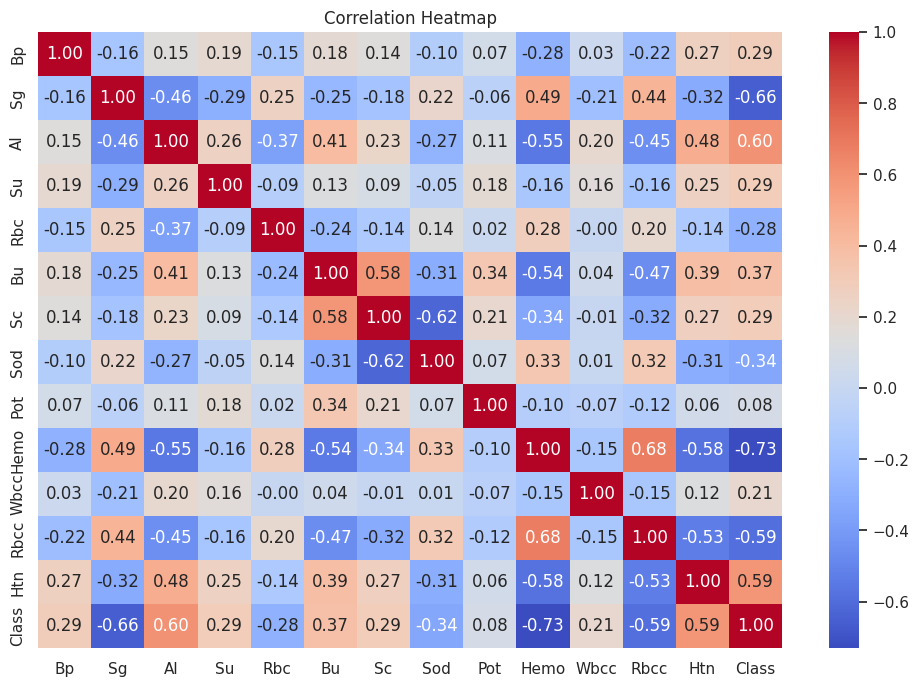

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# **Class Distributtion**

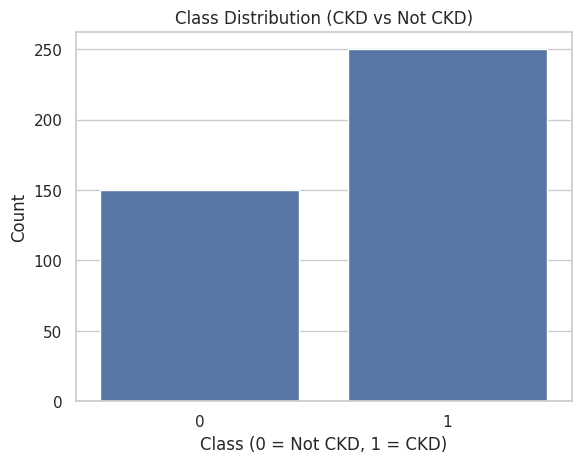

In [ ]:
sns.countplot(data=df, x='Class')
plt.title("Class Distribution (CKD vs Not CKD)")
plt.xlabel("Class (0 = Not CKD, 1 = CKD)")
plt.ylabel("Count")
plt.show()

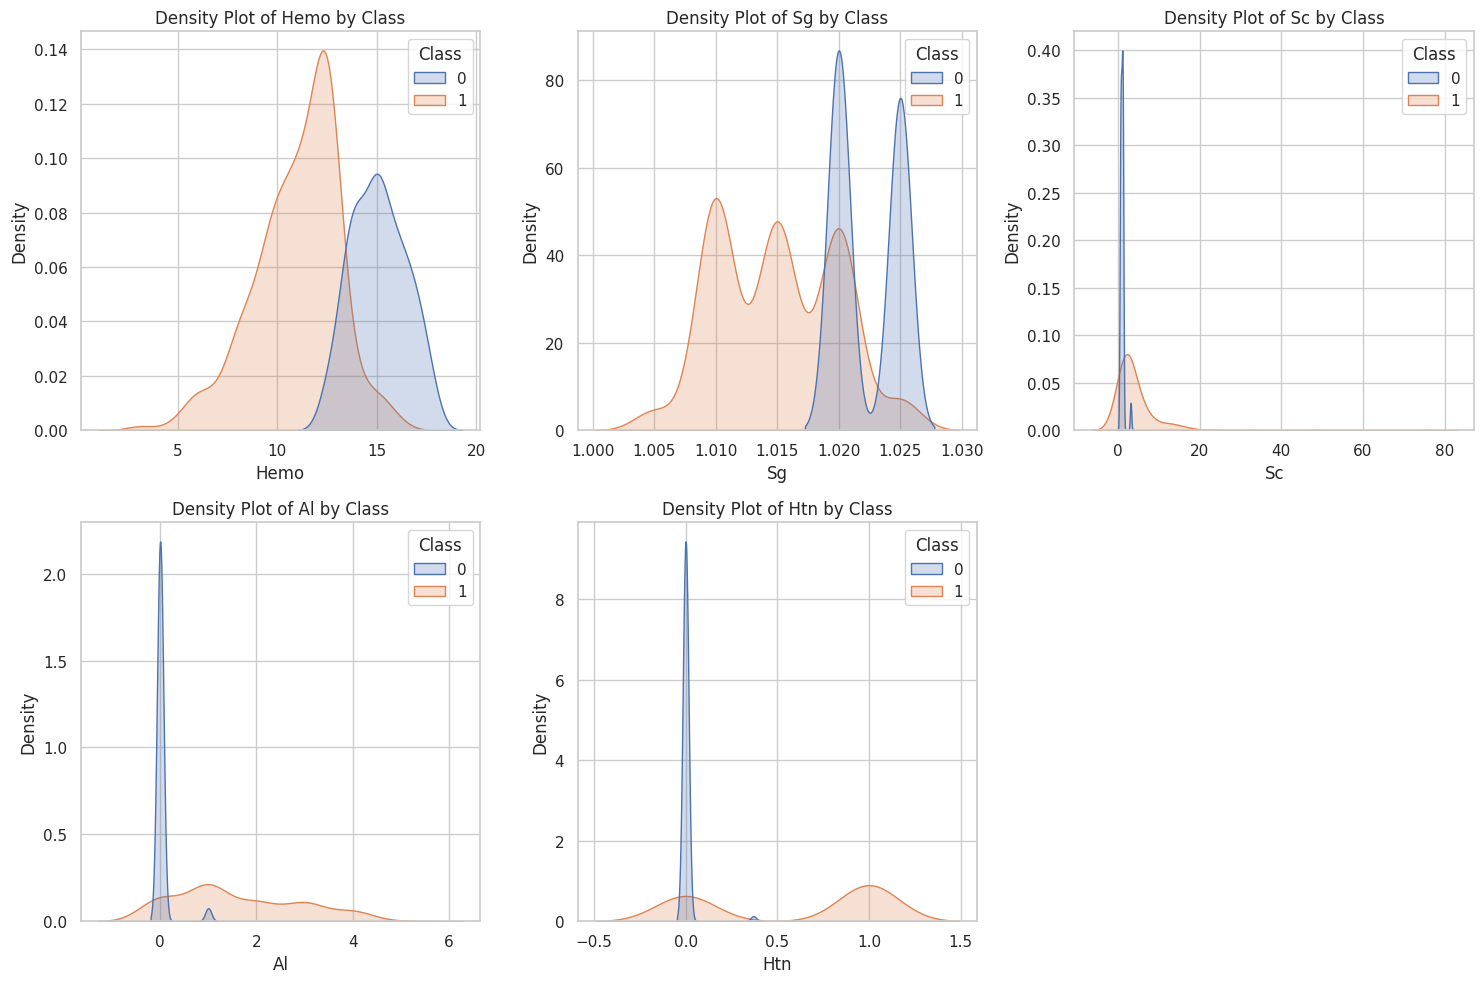

In [ ]:
# Plot density plots for important features by class
important_features = ['Hemo', 'Sg', 'Sc', 'Al', 'Htn']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features):
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(data=df, x=feature, hue='Class', fill=True)
    plt.title(f'Density Plot of {feature} by Class')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify continuous features
continuous_features = ['Bp', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardisation to continuous features
df[continuous_features] = scaler.fit_transform(df[continuous_features])

print("DataFrame after Standardisation:")
display(df.head())

DataFrame after Standardisation:


,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,0.263379,1.020,1.0,0.0,1.0,-0.434856,-0.333725,0.000106,0.000763,1.059100,7800.0,5.20,1.0,1
1,-1.965500,1.020,4.0,0.0,1.0,-0.800529,-0.405020,0.000106,0.000763,-0.452268,6000.0,4.71,0.0,1
2,0.263379,1.010,2.0,3.0,1.0,-0.089498,-0.226782,0.000106,0.000763,-1.078932,7500.0,4.71,0.0,1
3,-0.479581,1.005,4.0,0.0,1.0,-0.028553,0.129695,-2.885860,-0.755560,-0.489130,6700.0,3.90,1.0,1
4,0.263379,1.010,2.0,0.0,1.0,-0.638008,-0.298077,0.000106,0.000763,-0.341680,7300.0,4.60,0.0,1


# **Model implimentation**

In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


## **Model Initialization**


In [ ]:


# Split data
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {

    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "k-NN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=500)
}


## **Model Evalution**

--- Gradient Boosting Performance ---
Accuracy: 0.9875
Precision: 1.0000
Recall: 0.9808
F1-score: 0.9903

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

------------------------------
--- SVM Performance ---
Accuracy: 0.6500
Precision: 0.6500
Recall: 1.0000
F1-score: 0.7879

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.65      1.00      0.79        52

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80

------------------------------
--- k-NN Performance ---
Accuracy: 0.725

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


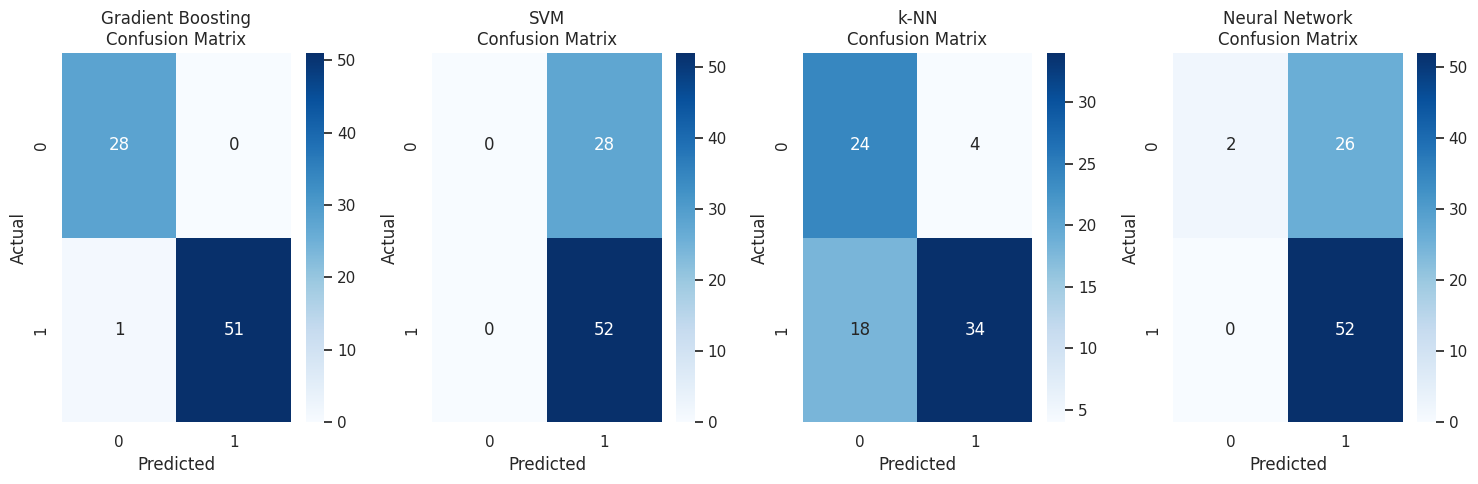

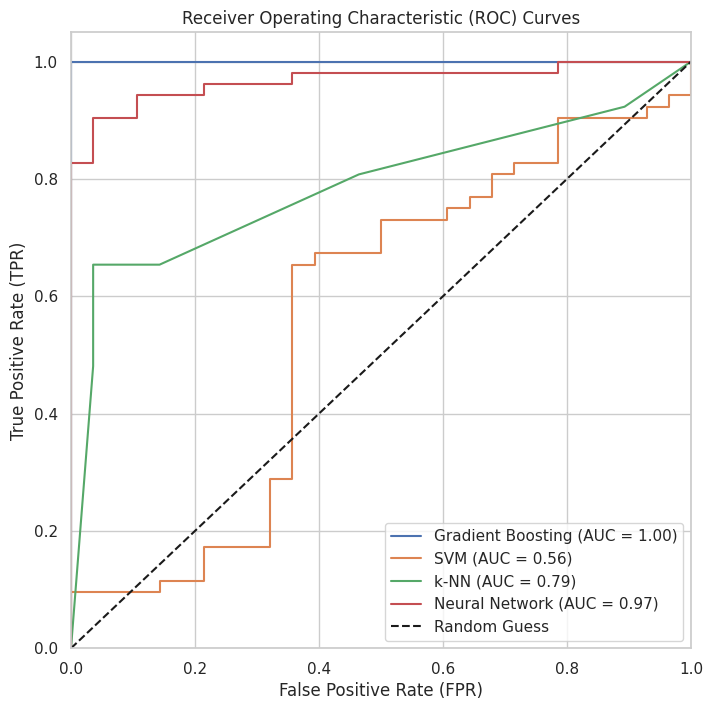

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Performance Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "y_pred": y_pred,
        "y_prob": y_prob
    }

# Print Performance Metrics and Classification Report
for name, metrics in results.items():
    print(f"--- {name} Performance ---")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-score: {metrics['f1_score']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, metrics['y_pred']))
    print("-" * 30)

# Plot Confusion Matrices
plt.figure(figsize=(15, 5))
for i, (name, metrics) in enumerate(results.items()):
    cm = confusion_matrix(y_test, metrics['y_pred'])
    plt.subplot(1, len(models), i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name}\nConfusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Plot ROC Curves
plt.figure(figsize=(8, 8))
for name, metrics in results.items():
    fpr, tpr, _ = roc_curve(y_test, metrics['y_prob'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# **Feature Reduction**

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

accuracies = []

# Try reducing features from 12 down to 3
for k in range(3, len(X.columns)+1):
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    X_new = selector.fit_transform(X, y)

    X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_new, y, test_size=0.2, random_state=42)

    model = GradientBoostingClassifier()
    model.fit(X_train_k, y_train_k)
    preds_k = model.predict(X_test_k)
    acc_k = accuracy_score(y_test_k, preds_k)
    accuracies.append((k, acc_k))

# Display results
print("\n Feature Reduction Results:")
for k, acc in accuracies:
    print(f"{k} features → Accuracy: {acc:.4f}")



 Feature Reduction Results:
3 features → Accuracy: 0.9500
4 features → Accuracy: 0.9625
5 features → Accuracy: 0.9875
6 features → Accuracy: 0.9875
7 features → Accuracy: 1.0000
8 features → Accuracy: 1.0000
9 features → Accuracy: 0.9875
10 features → Accuracy: 0.9875
11 features → Accuracy: 0.9875
12 features → Accuracy: 0.9875
13 features → Accuracy: 0.9875


# ***SHAP***

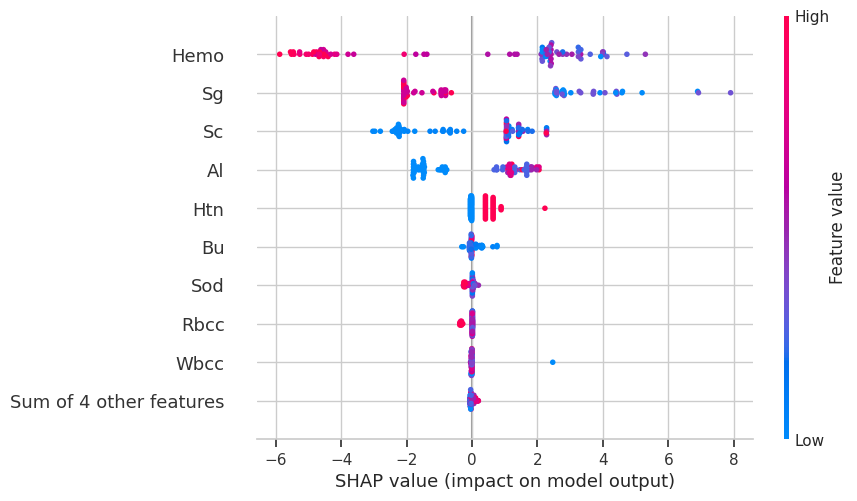

In [ ]:
# Ensure SHAP is installed
!pip install shap

import shap

# Use TreeExplainer (for tree-based models like GradientBoosting)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Plot summary
shap.plots.beeswarm(shap_values)


# **Cross validation**

In [ ]:


from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
n_splits = 5  # You can change this number

# Initialize the KFold cross-validation object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

cross_val_results = {}

for name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy') # You can change the scoring metric

    cross_val_results[name] = {
        "mean_accuracy": cv_scores.mean(),
        "std_accuracy": cv_scores.std(),
        "all_scores": cv_scores
    }

# Print cross-validation results
print("\n--- Cross-Validation Results (Mean Accuracy over 5 folds) ---")
for name, metrics in cross_val_results.items():
    print(f"{name}: Mean Accuracy = {metrics['mean_accuracy']:.4f} (+/- {metrics['std_accuracy']:.4f})")
    # print(f"   Individual fold scores: {metrics['all_scores']}") # Uncomment to see individual scores


--- Cross-Validation Results (Mean Accuracy over 5 folds) ---
Gradient Boosting: Mean Accuracy = 0.9775 (+/- 0.0200)
SVM: Mean Accuracy = 0.6250 (+/- 0.0345)
k-NN: Mean Accuracy = 0.7025 (+/- 0.0348)
Neural Network: Mean Accuracy = 0.6475 (+/- 0.1329)
